# Fetal Health Prediction

## Introduction

This dataset is about Fetal health, We will perform a Classification model to predict if the fetal status is Normal, Suspect or Pathological.


## Goal

   We will classify the data into three categories using various classification algorithms to achieve lowest prediction error.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action="ignore")


In [2]:
data = pd.read_csv('fetal_health.csv')
data.head().T

,0,1,2,3,4
baseline value,120.0,132.000,133.000,134.000,132.000
accelerations,0.0,0.006,0.003,0.003,0.007
fetal_movement,0.0,0.000,0.000,0.000,0.000
uterine_contractions,0.0,0.006,0.008,0.008,0.008
light_decelerations,0.0,0.003,0.003,0.003,0.000
severe_decelerations,0.0,0.000,0.000,0.000,0.000
prolongued_decelerations,0.0,0.000,0.000,0.000,0.000
abnormal_short_term_variability,73.0,17.000,16.000,16.000,16.000
mean_value_of_short_term_variability,0.5,2.100,2.100,2.400,2.400
percentage_of_time_with_abnormal_long_term_variability,43.0,0.000,0.000,0.000,0.000


## Data Structure

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


## Data Cleaning

In [5]:
data = data.drop(['histogram_min','histogram_median','histogram_mode'], axis=1)
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mean,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,126.0,2.0,0.0,137.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,198.0,6.0,1.0,136.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,198.0,5.0,1.0,135.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,170.0,11.0,0.0,134.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,170.0,9.0,0.0,136.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,177.0,4.0,0.0,150.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,169.0,6.0,0.0,148.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,170.0,5.0,0.0,148.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,169.0,6.0,0.0,147.0,4.0,1.0,2.0


In [6]:
#Checking for Null values 

data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mean                                            0
histogram_variance                      

## Data Analysis

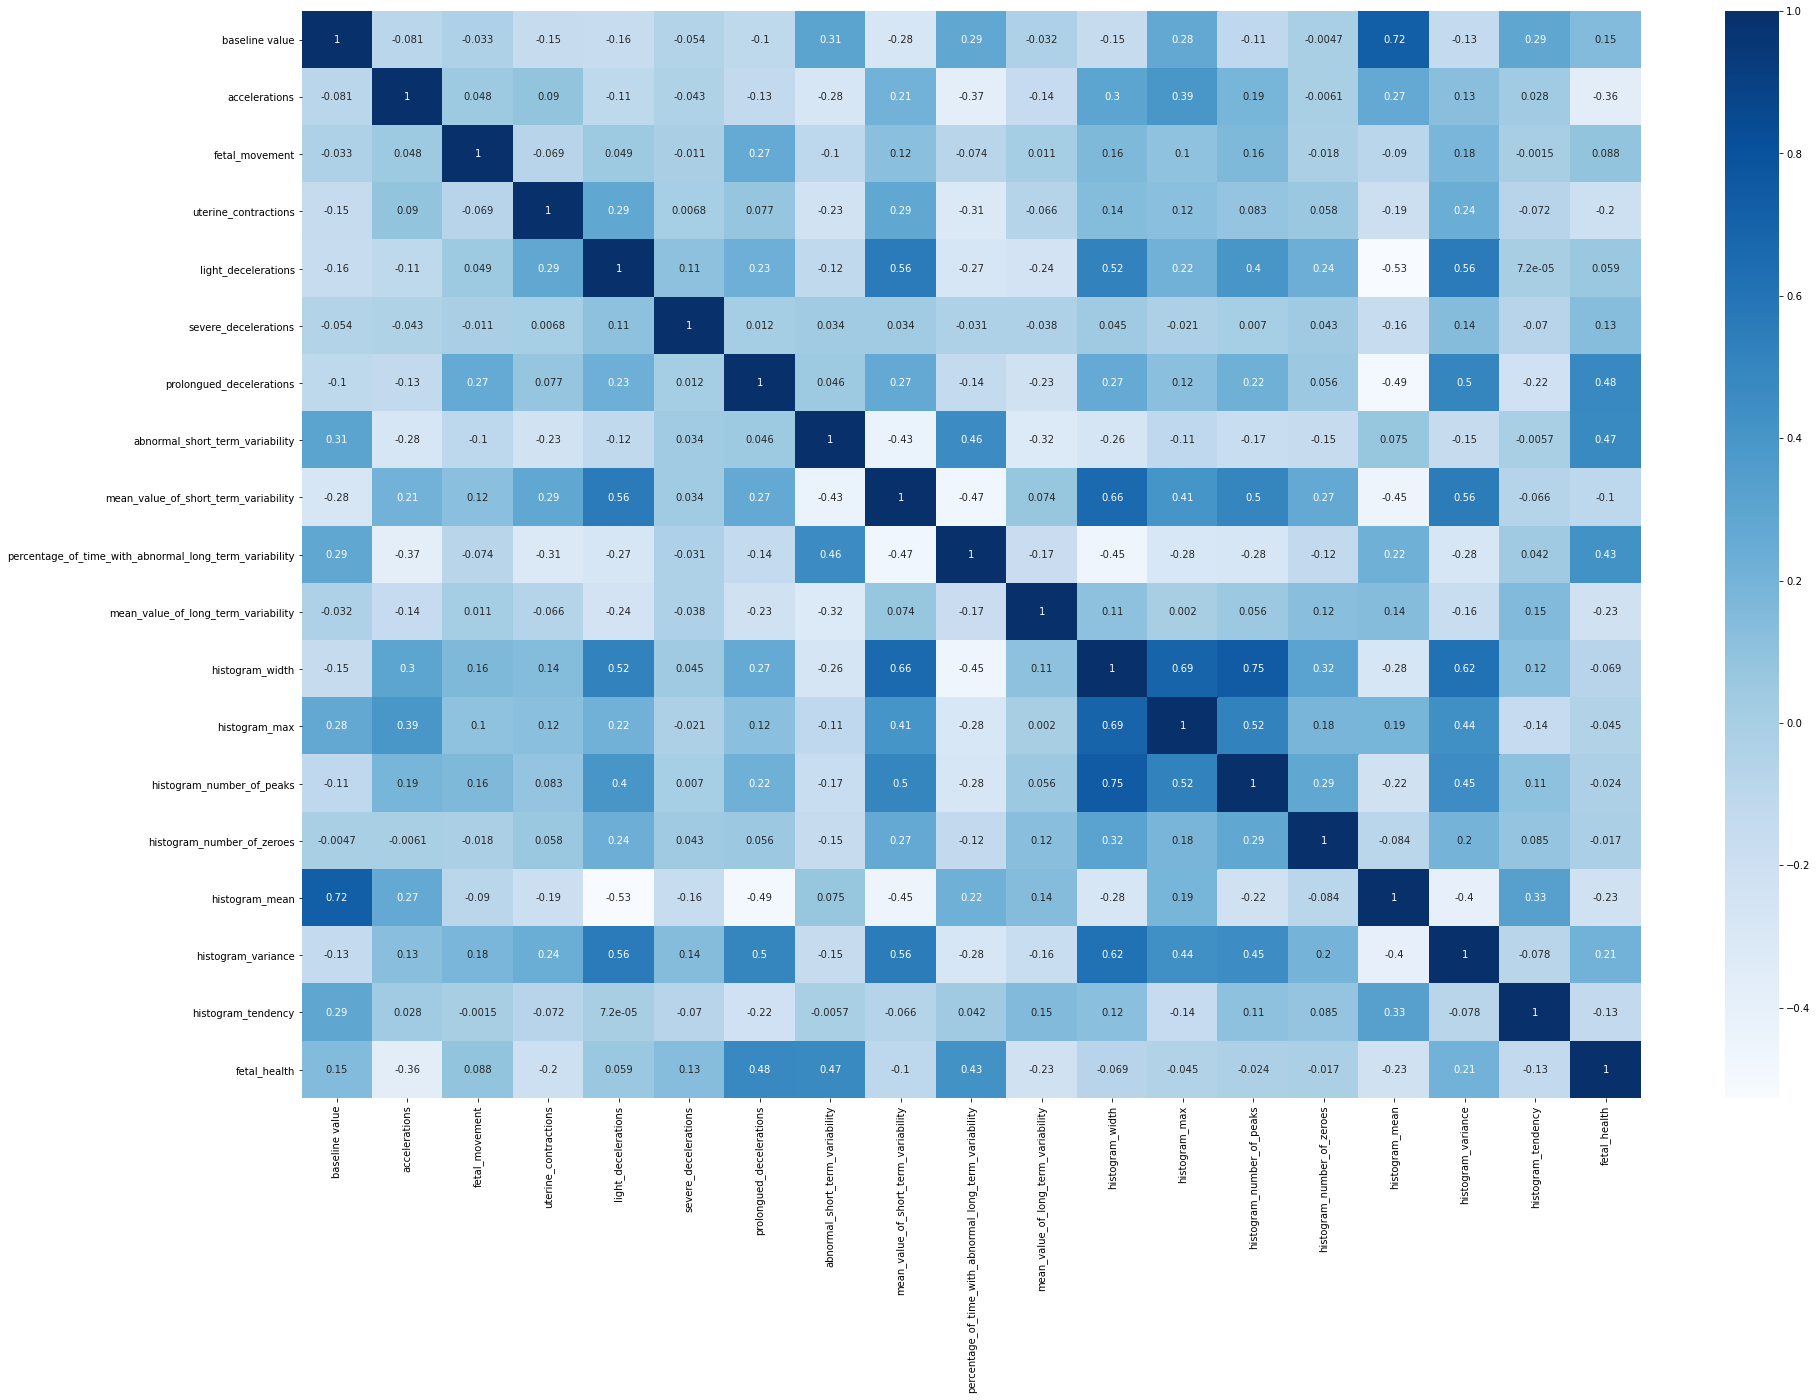

In [7]:
corr = data.corr()

plt.figure(figsize=(30,20))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

In [8]:
# Split the data 

X = data.drop(['fetal_health'], axis=1)
y = data['fetal_health']


In [9]:
data['fetal_health'].unique()

array([2., 1., 3.])

In [10]:
from collections import Counter

counter = Counter(y)
for k, v in counter.items():
    dist = v / len(y) * 100
    print(f"Class={k}, n={v} ({dist}%)")

Class=2.0, n=295 (13.8758231420508%)
Class=1.0, n=1655 (77.84571966133585%)
Class=3.0, n=176 (8.27845719661336%)


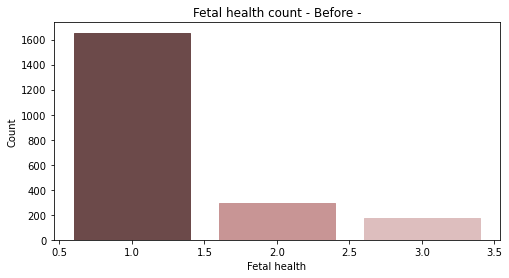

In [11]:
plt.figure(1, figsize=(8, 4))
barlist= plt.bar(counter.keys(), counter.values());
barlist[0].set_color('#C89595')
barlist[1].set_color('#6C4A4A')
barlist[2].set_color('#DDBEBE')
plt.title("Fetal health count - Before -");


plt.xlabel("Fetal health")
plt.ylabel("Count");

### SMOTE Algorithm for balance the data

In [12]:
!pip install imblearn 
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [13]:
counter = Counter(y)
for k, v in counter.items():
    dist = v / len(y) * 100
    print(f"Class={k}, n={v} ({dist}%)")

Class=2.0, n=1655 (33.33333333333333%)
Class=1.0, n=1655 (33.33333333333333%)
Class=3.0, n=1655 (33.33333333333333%)


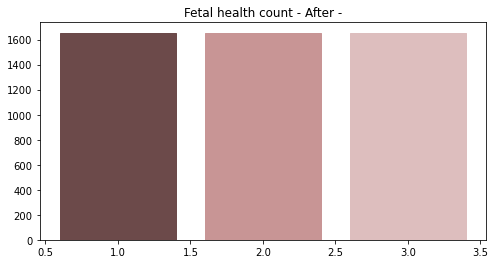

In [14]:
plt.figure(1, figsize=(8, 4))
barlist= plt.bar(counter.keys(), counter.values());
barlist[0].set_color('#C89595')
barlist[1].set_color('#6C4A4A')
barlist[2].set_color('#DDBEBE')
plt.title("Fetal health count - After -");

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

## Classification Models

<h3>Logistic Regression</h3>

In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7987117552334944

In [17]:
lr = LogisticRegression(C=10, intercept_scaling=1, tol=0.0001, penalty="l2", solver="liblinear", random_state=42)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8309178743961353

In [18]:
pred = lr.predict(X_test)

In [19]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         1.0       0.90      0.82      0.86       433
         2.0       0.75      0.81      0.78       404
         3.0       0.85      0.87      0.86       405

    accuracy                           0.83      1242
   macro avg       0.83      0.83      0.83      1242
weighted avg       0.84      0.83      0.83      1242



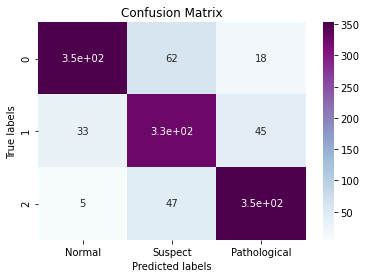

In [20]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred), annot=True, ax = ax, cmap = "BuPu");

ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

<h3>Random Forest </h3>

In [21]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9734299516908212

In [22]:
rf = RandomForestClassifier(criterion="gini", n_estimators = 100, min_samples_leaf=1, min_samples_split=2, random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9718196457326892

In [23]:
pred_rf = rf.predict(X_test)

In [24]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

         1.0       0.98      0.95      0.96       433
         2.0       0.95      0.97      0.96       404
         3.0       0.99      1.00      0.99       405

    accuracy                           0.97      1242
   macro avg       0.97      0.97      0.97      1242
weighted avg       0.97      0.97      0.97      1242



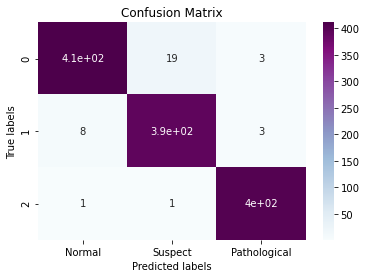

In [25]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_rf), annot=True, ax = ax, cmap = "BuPu")

ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

<h3>Gradient Boosting Classifier</h3>

In [26]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
model.score(X_test, y_test)

0.9734299516908212

In [27]:
pred_gbc = gbc.predict(X_test)

In [28]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

         1.0       0.98      0.95      0.96       433
         2.0       0.95      0.97      0.96       404
         3.0       0.99      0.99      0.99       405

    accuracy                           0.97      1242
   macro avg       0.97      0.97      0.97      1242
weighted avg       0.97      0.97      0.97      1242



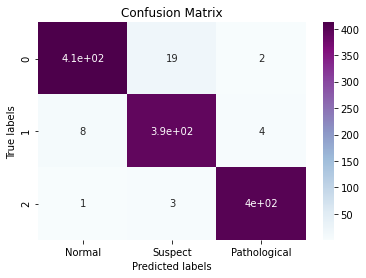

In [29]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_gbc), annot=True, ax = ax, cmap = "BuPu")

ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

<h3>XGBoost Classifier</h3>

In [30]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

[20:02:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9782608695652174

In [31]:
pred_xgb = xgb.predict(X_test)

In [32]:

print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

         1.0       0.99      0.97      0.98       433
         2.0       0.96      0.98      0.97       404
         3.0       0.99      1.00      0.99       405

    accuracy                           0.98      1242
   macro avg       0.98      0.98      0.98      1242
weighted avg       0.98      0.98      0.98      1242



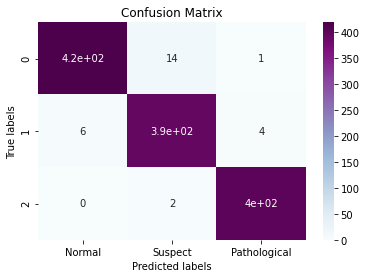

In [33]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_xgb), annot=True, ax = ax, cmap = "BuPu")

ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

In [34]:
model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])
models = {"Logistic Regression": LogisticRegression(),
          'Random Forest' : RandomForestClassifier(),
          'Gradient Boosting' : GradientBoostingClassifier(),
          'XGBoost' : XGBClassifier(early_stopping_rounds = 300)
          }

for test, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    print( test + ' scores')
    print(acc)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print('*' * 100)
    model_accuracy = model_accuracy.append({'Model': test, 'Accuracy': acc}, ignore_index=True)

Logistic Regression scores
0.7987117552334944
              precision    recall  f1-score   support

         1.0       0.84      0.78      0.81       433
         2.0       0.70      0.74      0.72       404
         3.0       0.86      0.87      0.87       405

    accuracy                           0.80      1242
   macro avg       0.80      0.80      0.80      1242
weighted avg       0.80      0.80      0.80      1242

[[338  79  16]
 [ 61 300  43]
 [  3  48 354]]
****************************************************************************************************
Random Forest scores
0.9726247987117552
              precision    recall  f1-score   support

         1.0       0.98      0.95      0.96       433
         2.0       0.95      0.98      0.96       404
         3.0       0.99      1.00      0.99       405

    accuracy                           0.97      1242
   macro avg       0.97      0.97      0.97      1242
weighted avg       0.97      0.97      0.97      1242

[[411

In [35]:
model_accuracy.sort_values(ascending=True, by = 'Accuracy')


,Model,Accuracy
0,Logistic Regression,0.798712
2,Gradient Boosting,0.968599
1,Random Forest,0.972625
3,XGBoost,0.978261


## Best Model XGBoost

In [36]:

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[418  14   1]
 [  6 394   4]
 [  0   2 403]]


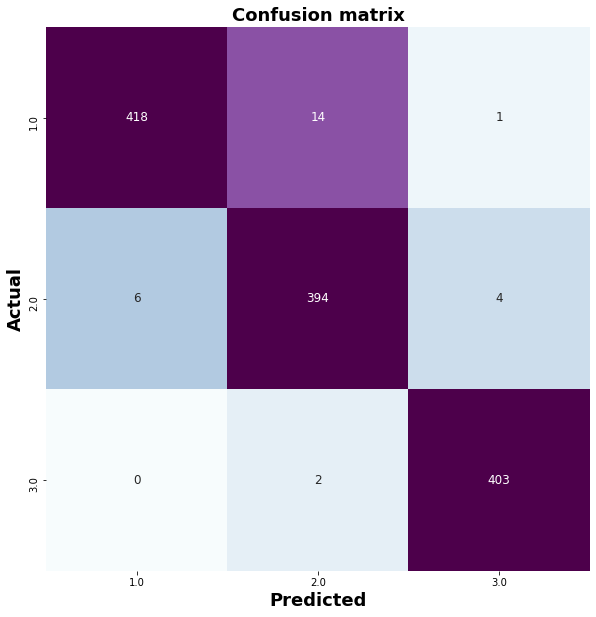

In [37]:
cm_df = pd.DataFrame(conf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
cm_df.columns.name = 'Predicted'
cm_df.index.name = 'Actual'
cm_df
plt.figure(figsize=(10,10))

plt.xlabel('Predicted',fontdict = {'fontsize': 18},weight = 'bold')
plt.ylabel('Actual',fontdict = {'fontsize': 18},weight = 'bold')

plt.title('Confusion matrix',fontdict = {'fontsize': 18},weight = 'bold')



sns.heatmap(cm_df, annot=True, vmax=20, square=True, cmap="BuPu",annot_kws={"size":12} ,cbar=False, fmt='g');


## Conclusion

As we see in the Confusion matrix, we have 415 fetal correctly predicted normal and 398 fetal correctly predicted as suspectand and 402 fetal correctly predicted as Pathological.